In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import joblib
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


Dataset Shape: (1025, 14)

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
# Exploratory Data Analysis
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nTarget Distribution:")
print(df['target'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal       

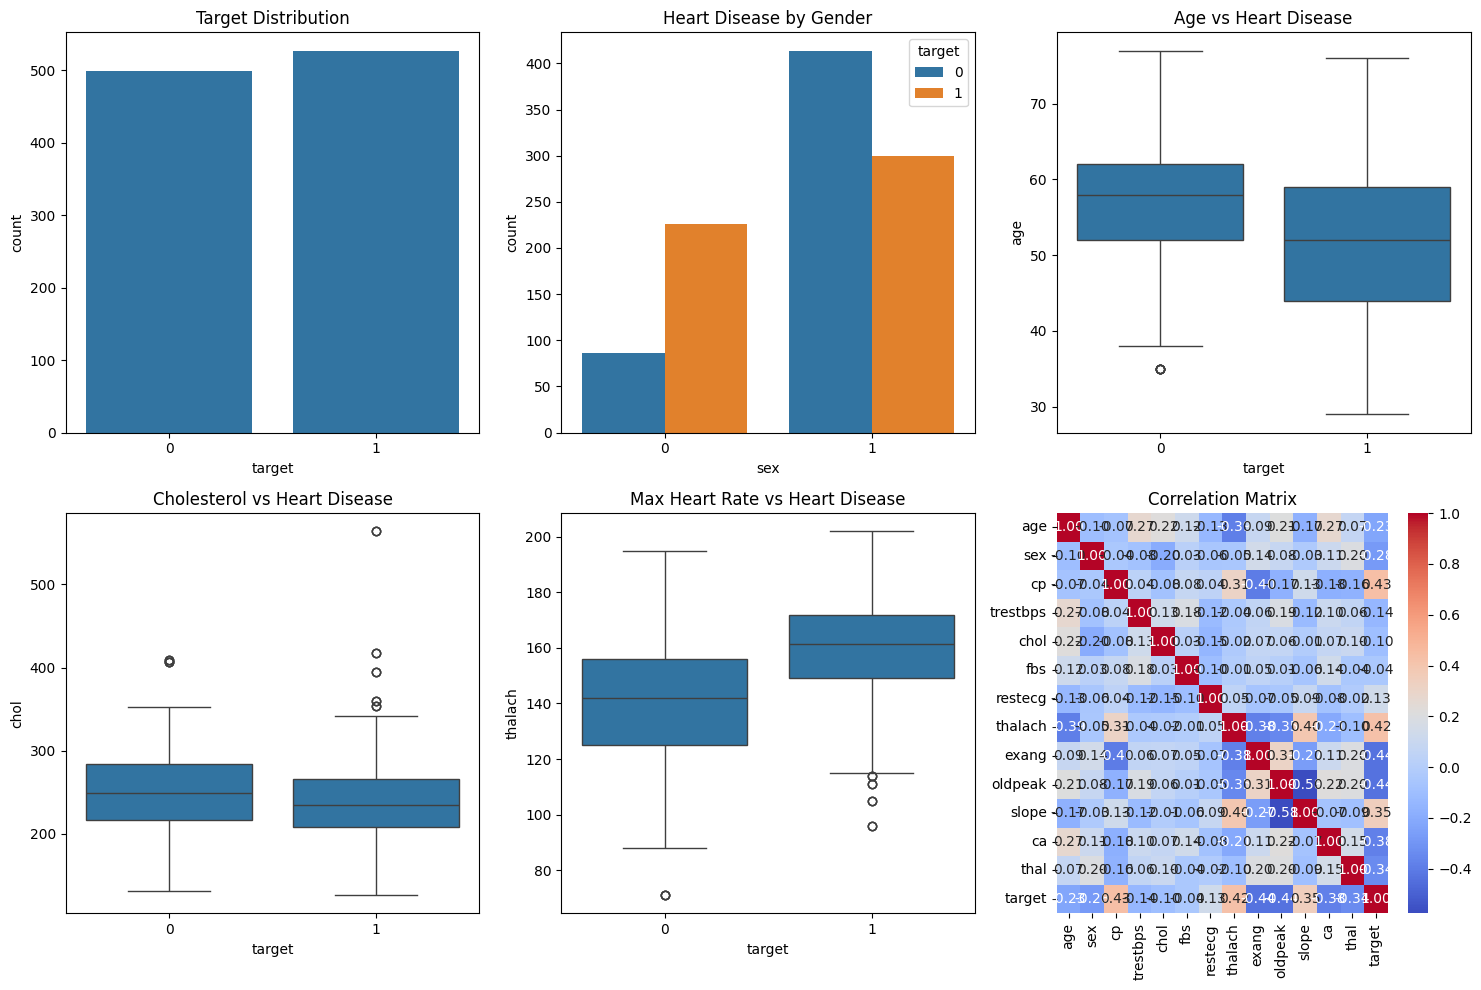

In [17]:
# Visualizations
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='target', data=df)
plt.title('Target Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease by Gender')

plt.subplot(2, 3, 3)
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Heart Disease')

plt.subplot(2, 3, 4)
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol vs Heart Disease')

plt.subplot(2, 3, 5)
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Max Heart Rate vs Heart Disease')

plt.subplot(2, 3, 6)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [18]:
# Prepare data for machine learning
X = df.drop('target', axis=1)
y = df['target']

In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [22]:

# Machine Learning Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [23]:

# Train and evaluate ML models
ml_results = {}

for name, model in models.items():
    if name in ['SVM', 'K-Nearest Neighbors', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    ml_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'predictions': y_pred
    }
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print("-" * 50)

Logistic Regression:
  Accuracy: 0.8098
  ROC AUC: 0.8071
--------------------------------------------------
Random Forest:
  Accuracy: 1.0000
  ROC AUC: 1.0000
--------------------------------------------------
SVM:
  Accuracy: 0.9268
  ROC AUC: 0.9264
--------------------------------------------------
K-Nearest Neighbors:
  Accuracy: 0.8634
  ROC AUC: 0.8636
--------------------------------------------------
Gradient Boosting:
  Accuracy: 0.9756
  ROC AUC: 0.9755
--------------------------------------------------


In [24]:
# Find best ML model
best_ml_model_name = max(ml_results, key=lambda x: ml_results[x]['accuracy'])
best_ml_model = ml_results[best_ml_model_name]['model']
print(f"\nBest ML Model: {best_ml_model_name}")



Best ML Model: Random Forest


In [25]:
# Save best ML model
if best_ml_model_name in ['SVM', 'K-Nearest Neighbors', 'Logistic Regression']:
    joblib.dump(best_ml_model, 'best_ml_model.pkl')
else:
    joblib.dump(best_ml_model, 'best_ml_model.pkl')

In [26]:
# Deep Learning Model
print("\n" + "="*50)
print("DEEP LEARNING MODELS")
print("="*50)


DEEP LEARNING MODELS


In [27]:
# Simple Neural Network
def create_simple_nn():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [28]:
# More Complex Neural Network
def create_complex_nn():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )
    return model


In [29]:

# Create and train models
simple_nn = create_simple_nn()
complex_nn = create_complex_nn()

print("Simple Neural Network Summary:")
simple_nn.summary()

print("\nTraining Simple Neural Network...")
simple_history = simple_nn.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

print("\nTraining Complex Neural Network...")
complex_history = complex_nn.fit(
    X_train_scaled, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

Simple Neural Network Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)


Training Simple Neural Network...

Training Complex Neural Network...


In [30]:

# Evaluate DL models
dl_models = {
    'Simple NN': simple_nn,
    'Complex NN': complex_nn
}

dl_results = {}

for name, model in dl_models.items():
    # Predict probabilities
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    dl_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print("-" * 50)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Simple NN:
  Accuracy: 0.9415
  ROC AUC: 0.9970
--------------------------------------------------
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Complex NN:
  Accuracy: 0.9951
  ROC AUC: 1.0000
--------------------------------------------------


In [43]:
# Find best DL model
best_dl_model_name = max(dl_results, key=lambda x: dl_results[x]['accuracy'])
best_dl_model = dl_results[best_dl_model_name]['model']
print(f"\nBest DL Model: {best_dl_model_name}")



Best DL Model: Complex NN


In [44]:
# Compare all models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

all_results = {**ml_results, **dl_results}

for name, results in all_results.items():
    print(f"{name}: Accuracy = {results['accuracy']:.4f}, ROC AUC = {results['roc_auc']:.4f}")



MODEL COMPARISON
Logistic Regression: Accuracy = 0.8098, ROC AUC = 0.8071
Random Forest: Accuracy = 1.0000, ROC AUC = 1.0000
SVM: Accuracy = 0.9268, ROC AUC = 0.9264
K-Nearest Neighbors: Accuracy = 0.8634, ROC AUC = 0.8636
Gradient Boosting: Accuracy = 0.9756, ROC AUC = 0.9755
Simple NN: Accuracy = 0.9415, ROC AUC = 0.9970
Complex NN: Accuracy = 0.9951, ROC AUC = 1.0000


In [45]:
# Find overall best model
best_overall_model_name = max(all_results, key=lambda x: all_results[x]['accuracy'])
best_overall_model = all_results[best_overall_model_name]['model']

print(f"\nOverall Best Model: {best_overall_model_name}")
print(f"Best Accuracy: {all_results[best_overall_model_name]['accuracy']:.4f}")



Overall Best Model: Random Forest
Best Accuracy: 1.0000


In [46]:

# Save the best DL model
if 'NN' in best_overall_model_name:
    best_overall_model.save('best_dl_model.h5')
    print("Best DL model saved as 'best_dl_model.h5'")



Detailed Evaluation for Random Forest:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix:


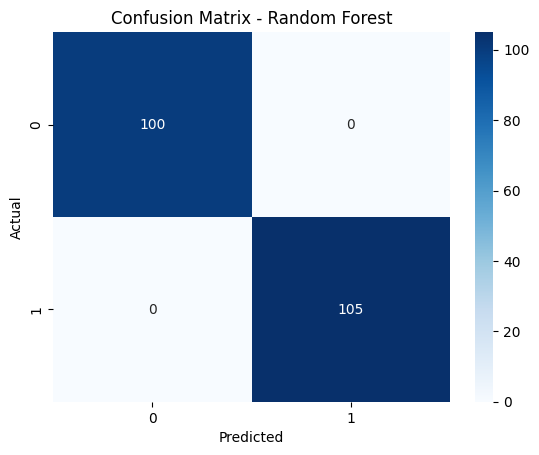

In [47]:
# Detailed evaluation of best model
print(f"\nDetailed Evaluation for {best_overall_model_name}:")
y_pred_best = all_results[best_overall_model_name]['predictions']

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_overall_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

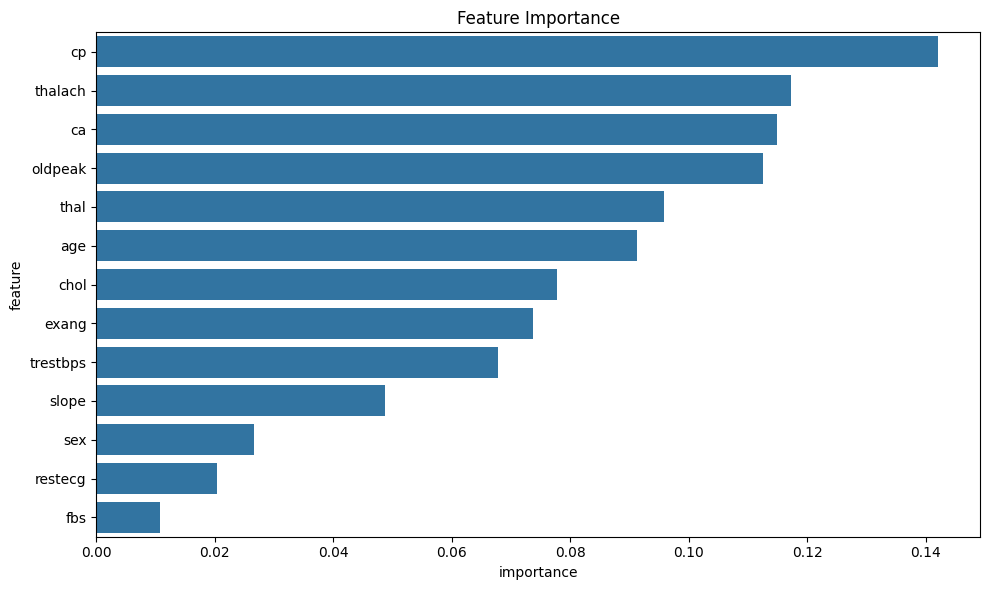

In [48]:

# Feature Importance (for tree-based models)
if hasattr(best_overall_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_overall_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

In [49]:
# Training history plots for DL models
if 'NN' in best_overall_model_name:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    if best_overall_model_name == 'Simple NN':
        history = simple_history
    else:
        history = complex_history
    
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
